# Project Content: Investigate a Dataset No-show appointments

## Table of Contents

- [ 1-INTRODUCTION](#Introduction)
- [ 2-DATA CLEANING](#Data Cleaning)
- [ 3-DATA ANALYSIS](#Data Analysis)
- [ 4-CONCLUSION](#Conclusions)


<a id='introduction'></a>


## 1-INTRODUCTION

**Description of Dataset**: "No-Show appointments":This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Each column's explanation is as follows

1. __*`PatientId`*__: indicates patient's ID.It can be more than one time in the column, due to number of appointments he/she books.
   
2. __*`AppointmentID`*__: indicates appointment ID.It is unique in data-set.

3. __*`Gender`*__: indicates wheater patient is male(M) or female(F).

4. __*`ScheduledDay`*__: tells us on what day the patient set up their appointment.

5. __*`AppointmentDay`*__: tells us on what day the patient book to see doctor.

6. __*`Age`*__: tells us age of patients.

7. __*`Neighborhood`*__: indicates the location of the hospital.

8. __*`Scholarship`*__: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

9. __*`SMS_received`*__: indicates wheater or not patient received reminding SMS

10. __*`No-show`*__:It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

11. __*`Hipertension,Diabetes,Alcoholism`*__: indicate wheater or not patient has dealed with these problems

12. __*`Handcap`*__: indicates wheater or not patient needs special assistance.



## 1.1-**Questions to be asked


<ul>

    <ol>
        <li>What is the overall appointment show-up vs. no show-up rate?</li>
        <li>What is the number of male and female patients?</li>
        <li>What is the relationship between show-up no-showup and gender?</li>
        <li>Which neighbourhood has the largest number of appointments? </li>
        <li>What is the number of patient who has scholarship? </li>
        <li>What is the number of patient who dealed with hypertension,diabetes and alcoholism ?</li>
        <li>What is the number of patients who received an SMS? </li>
    </ol>
</ul>


## 2- DATA CLEANING

Based on the questions brainstormed above, we want to know do we have all the valid values of the variables that we want to calculate and how can this data be trimmed. This will also make our dataset clean and easy for us to calculate what we want.

In [1]:
#Necessary packages are selected  in this cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#data set is read from csv file.
data_set = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data_set.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
rows, col = data_set.shape
#since 'rows' includes count of a header, we need to remove its count.
print('We have {} total entries of rows and {} columns of it.'.format(rows-1, col))

We have 110526 total entries of rows and 14 columns of it.


In [57]:
#isnull() function returns True if there is missing value else False.
#I check that wheater there is missing value in dataset
data_set.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [2]:
#I check the types of each column.
#ScheduledDay's & AppointmentDay's dtypes will be changed to date-time
#PatientID and AppointmentID types will be changed to integer
data_set.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
# If there is duplicate row in data , we must delete it ,
#There is no duplicate row in ou
data_set.duplicated().sum()

0

In [4]:
#I know that patient can set up appointment more than one time
sum(data_set.PatientId.duplicated())

48228

In [5]:
#Since I know that appointmentID must be unique,we can check wheater our data is clean or not
sum(data_set.AppointmentID.duplicated())

0

In [6]:
#I will not proceed with negative PatientID
data_set[data_set.PatientId < 0]['PatientId']


Series([], Name: PatientId, dtype: float64)

In [7]:
#I will not proceed with negative AppointmentID
data_set[data_set.AppointmentID < 0]['AppointmentID']


Series([], Name: AppointmentID, dtype: int64)

In [8]:
#ScheduledDay's & AppointmentDay's dtypes are changed to date
data_set['ScheduledDay'] = pd.to_datetime(data_set['ScheduledDay']).dt.date
data_set['AppointmentDay'] = pd.to_datetime(data_set['AppointmentDay']).dt.date


In [9]:
#we also need avoid negative difference between ScheduledDay - AppointmentDay
#to do that we create new column 'days_to_Appointment'
#I should exclude these rows from our data
data_set['days_to_Appointment'] = data_set.AppointmentDay - data_set.ScheduledDay

data_set[data_set['days_to_Appointment'] < '0']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_to_Appointment
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


In [10]:
# I had 110526 data rows(1 was for header).
#Now we have 110522 rows.

data_set = data_set[data_set['AppointmentDay'] >= data_set['ScheduledDay']]
data_set.shape

(110522, 15)

In [11]:
#PatientID and AppointmentID types are changed to integer
data_set['PatientId'] = (data_set['PatientId']).astype('int64')
data_set['AppointmentID'] = (data_set['AppointmentID']).astype('int64')
data_set.dtypes


PatientId                        int64
AppointmentID                    int64
Gender                          object
ScheduledDay                    object
AppointmentDay                  object
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
No-show                         object
days_to_Appointment    timedelta64[ns]
dtype: object

In [12]:
#There must be 2 types of gender
data_set['Gender'].unique()

array(['F', 'M'], dtype=object)

In [13]:
#I must check wheater or not there is negative age.If we have negative age in data set, we must delete it from data set
data_set[data_set.Age < 0]['Age']
#data_set.shape


99832   -1
Name: Age, dtype: int64

In [14]:
#I also remove the row which includes inforation about patient who is -1 year old.
data_set = data_set[data_set['Age'] >= 0]
data_set.shape

(110521, 15)

In [15]:
data_set['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# I add new column'Apperance' to change 'No-Show' values to integer
data_set ['Apperance'] = data_set['No-show']

data_set.head(40)



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_to_Appointment,Apperance
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days,No
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2 days,No
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,Yes
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,Yes
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0 days,No
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2 days,No


In [22]:
data_set['Apperance'] = data_set['Apperance'].apply({'Yes':'noshow', 'No':'show'}.get)

In [25]:
#https://stackoverflow.com/questions/23307301/pandas-replacing-column-values-in-dataframe
#I created new column with its values and changed the valued 'Yes' to 1 'No' to 0
data_set['Apperance_int'] = data_set['No-show'].apply({'Yes':1, 'No':0}.get)

In [26]:
data_set.head(30)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_to_Appointment,Apperance,Apperance_int
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,show,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days,show,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days,show,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days,show,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days,show,0
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2 days,show,0
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,noshow,1
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2 days,noshow,1
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0 days,show,0
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2 days,show,0


## 3-DATA ANALYSIS

In [17]:
#This function is for proportion based on one variable
def Ratio_of_variable(data_set, variable):
    return np.round(data_set[variable].value_counts()/data_set.shape[0]*100,2)

In [78]:
data_set['No-show'].value_counts()

No     88207
Yes    22314
Name: No-show, dtype: int64

In [79]:
#Shows the ratio of attendence of appointments.
Ratio_of_variable(data_set,'No-show')

No     79.81
Yes    20.19
Name: No-show, dtype: float64

In [196]:
#Draws pie chart with selected variables
##https://github.com/AmmarJawad/No-show-Medical-Appointments_Kaggle-dataset
def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [18]:
#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
#Number of absences at appointments are grouped by 'Gender'


print(data_set.groupby('Gender')['No-show'].value_counts())


Gender  No-show
F       No         57245
        Yes        14591
M       No         30962
        Yes         7723
Name: No-show, dtype: int64


In [30]:
#https://github.com/AmmarJawad/No-show-Medical-Appointments_Kaggle-dataset
#Creates plot bar

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.Apperance, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [31]:
Ratio_of_variable(data_set,'Gender')

F    65.0
M    35.0
Name: Gender, dtype: float64

Apperance,noshow,show
Gender,,
F,20.31,79.69
M,19.96,80.04


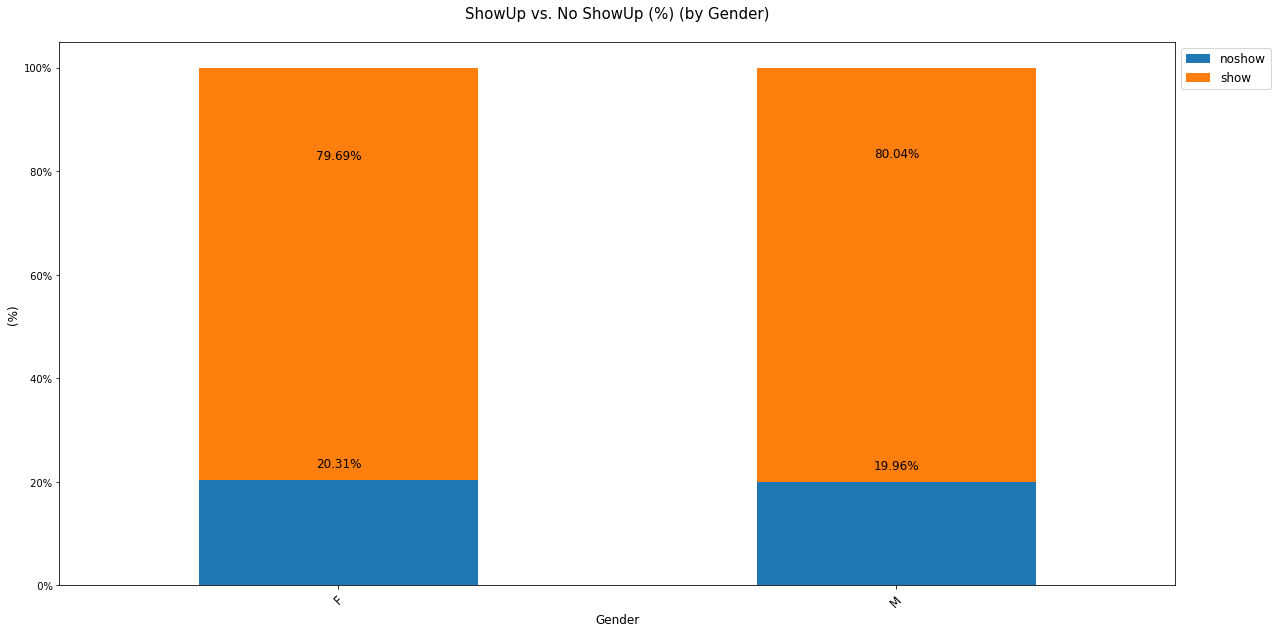

In [32]:
#Shows the apperance on appointment by gender
Show_No_Show_bar_plot(data_set, 'Gender')

In [178]:
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#Number of absences at appointments are grouped by 'Neighbourhood'
Ratio_of_variable(data_set,'Neighbourhood')
#data_set.groupby('Neighbourhood', as_index=False).agg({"Apperance_int": "sum"}).sort_values(by=['Apperance_int'],ascending=False)

JARDIM CAMBURI                 6.98
MARIA ORTIZ                    5.25
RESISTÊNCIA                    4.01
JARDIM DA PENHA                3.51
ITARARÉ                        3.18
CENTRO                         3.02
TABUAZEIRO                     2.83
SANTA MARTHA                   2.83
JESUS DE NAZARETH              2.58
BONFIM                         2.51
SANTO ANTÔNIO                  2.48
SANTO ANDRÉ                    2.33
CARATOÍRA                      2.32
JABOUR                         2.27
SÃO PEDRO                      2.21
ILHA DO PRÍNCIPE               2.05
NOVA PALESTINA                 2.05
ANDORINHAS                     2.05
DA PENHA                       2.01
ROMÃO                          2.00
GURIGICA                       1.83
SÃO JOSÉ                       1.79
BELA VISTA                     1.73
MARUÍPE                        1.72
FORTE SÃO JOÃO                 1.71
ILHA DE SANTA MARIA            1.71
SÃO CRISTÓVÃO                  1.66
REDENÇÃO                    

In [34]:
data_set.groupby('Neighbourhood', as_index=False).agg({"Apperance_int": "sum"}).sort_values(by=['Apperance_int'],ascending=False)

,Neighbourhood,Apperance_int
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
59,RESISTÊNCIA,905
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
78,TABUAZEIRO,572
8,BONFIM,550


In [38]:
data_set.groupby('Scholarship', as_index=False).agg({"Apperance": "count"})

,Scholarship,Apperance
0,0,99660
1,1,10861


0    90.17
1     9.83
Name: Scholarship, dtype: float64

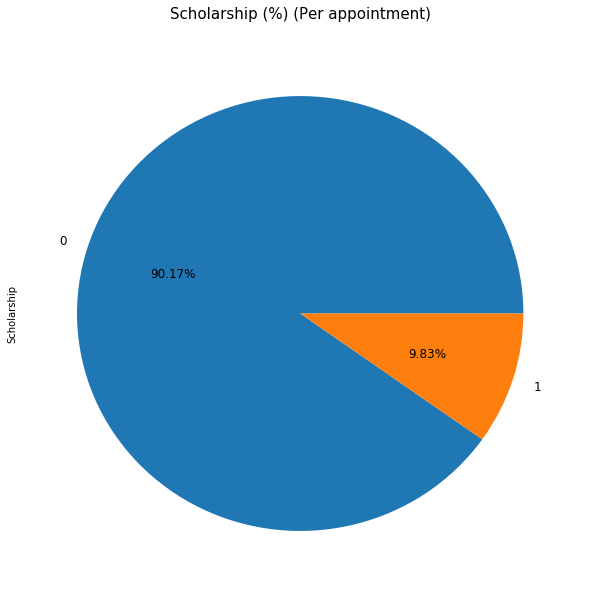

In [197]:
PropByVar(data_set,'Scholarship')

In [202]:
data_set.groupby('Hipertension', as_index=False).agg({"No-show": "count"})

,Hipertension,No-show
0,0,88720
1,1,21801


0    80.27
1    19.73
Name: Hipertension, dtype: float64

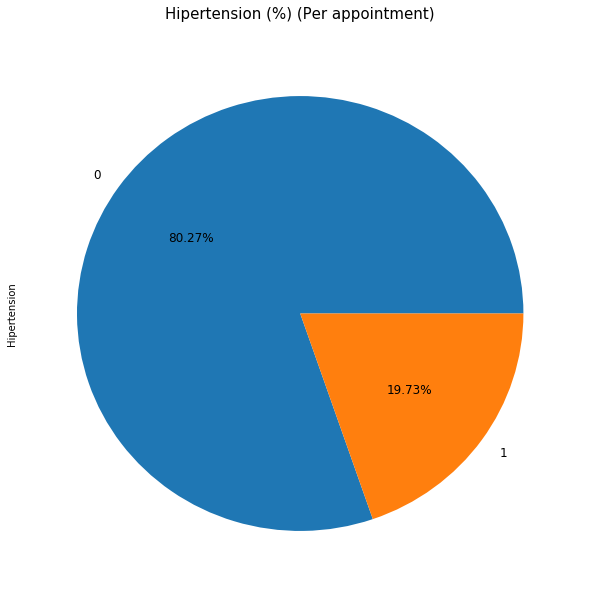

In [204]:
PropByVar(data_set,'Hipertension')

In [58]:
data_set.groupby('Diabetes', as_index=False).agg({"No-show": "count"})

,Diabetes,No-show
0,0,102579
1,1,7943


0    92.81
1     7.19
Name: Diabetes, dtype: float64

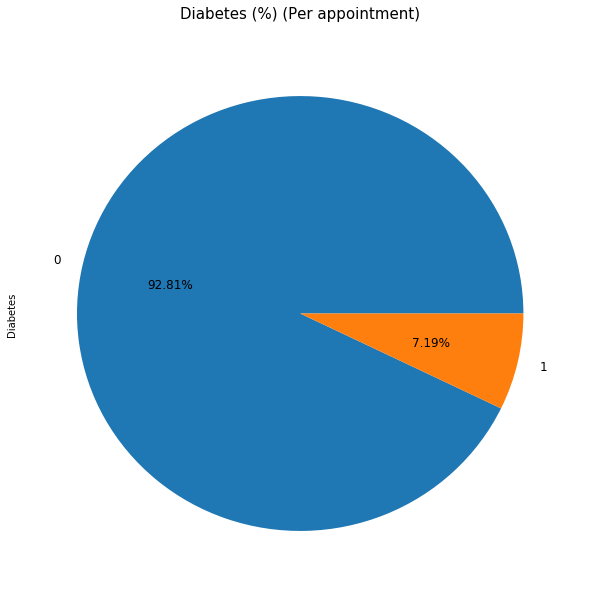

In [205]:
PropByVar(data_set,'Diabetes')

In [59]:
data_set.groupby('Alcoholism', as_index=False).agg({"No-show": "count"})

,Alcoholism,No-show
0,0,107162
1,1,3360


0    96.96
1     3.04
Name: Alcoholism, dtype: float64

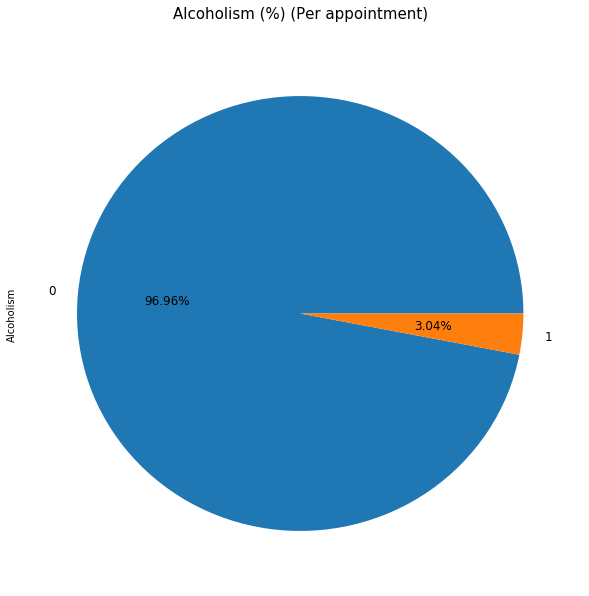

In [206]:
PropByVar(data_set,'Alcoholism')

In [62]:
data_set.groupby('SMS_received', as_index=False).agg({"No-show": "count"})

,SMS_received,No-show
0,0,75040
1,1,35482


0    67.9
1    32.1
Name: SMS_received, dtype: float64

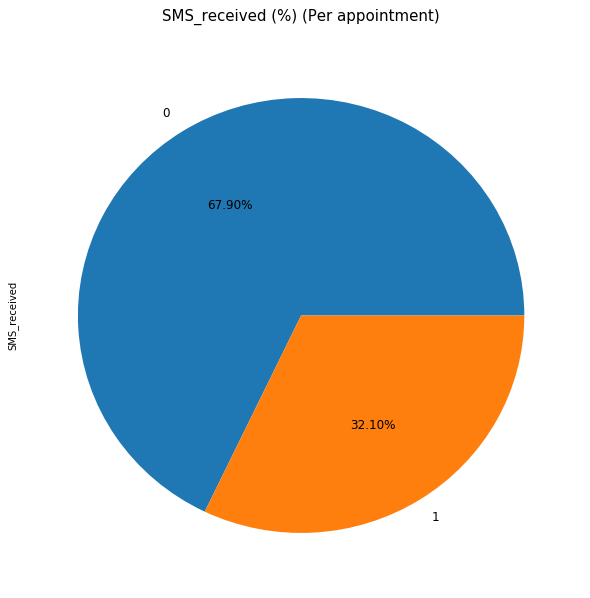

In [209]:
PropByVar(data_set,'SMS_received')

## 4-CONCLUSION

__*Q-1*__:What is the overall appointment show-up vs. no show-up rate?

__*A-1*__:Show-up rate is 79.81/ No-Show-up rate is 20.19

__*Q-2*__:What is the number of male and female patients?
    
__*A-2*__:The number of female patients is %65,
    
__*A-2*__:The number of male patients is %35

__*Q-3*__:What is the relationship between show-up no-showup and gender?
    
__*A-3*__:%79.69 female patients showed up their appointmets.
    
__*A-3*__:%80.04 male patients showed uptheir appointmets.

__*Q-4*__:Which neighbourhood has the largest number of appointments?
    
__*A-4*__:JARDIM CAMBURI has the largest number of appointments.

__*Q-5*__:What is the number of patient who has scholarship? 

__*A-5*__:%9.83 patient has scholarship.


__*Q-6*__:What is the number of patient who dealed with hypertension,diabetes and alcoholism ?

__*A-6*__:%19.73 patients deal with hypertension

__*A-6*__:%7.19 patients deal with diabetes

__*A-6*__:%3.04 patients deal with alcoholism

__*Q-7*__:What is the number of patients who received an SMS? 

__*Q-7*__:%32.1 patients received SMS